# Answering RQ2

In [1]:
import numpy as np
from scipy import stats
import pandas as pd

In [2]:
from _databrick import fix_df

In [3]:
trigger_df = fix_df[fix_df.Depth == 1]
trigger_df.shape

(1712, 5)

In [4]:
trigger_df.sample(5)

,Parent,Child,Bug Type,Depth,Refix
49894,abffa9938bc3b57a098c0914083e8a38933e25d6,fc843b6e1ae4f54afbc27b59b9952d19ac3369ea,Change Identifier Used,1,True
55353,4938ef5208c53f72deb5bf47e9cdd61612c51c57,652f03ae0cd5f595285f9fe514c14ff495af1176,Change Modifier,1,True
44191,3d5ae6b97dace0dbf7a39390a5791b2574fb6c64,59b22faeea4654afac3fea342e7662bf27a9f791,Change Modifier,1,True
4107,b865a3bab6b8d283c6b3bd7a7d0fca48cd91ad2d,33e47fa1725cc97644d16abf647edf60e888114a,Change Identifier Used,1,True
59017,03a6f06b21f28098f8c9597b0e0caffdfd6f34fc,db5222ef59500e20ac0df80d9a924cc9e1f2694e,Wrong Function Name,1,True


In [6]:
trigger_df.groupby('Bug Type').agg('size').sort_values(ascending=False)

Bug Type
Change Identifier Used         449
Wrong Function Name            254
Change Modifier                252
Same Function More Args        239
Change Numeric Literal         162
Change Binary Operator          73
Same Function Less Args         72
Change Boolean Literal          50
More Specific If                45
Less Specific If                42
Same Function Change Caller     28
Change Unary Operator           20
Change Operand                  15
Same Function Swap Args          6
Missing Throws Exception         3
Delete Throws Exception          2
dtype: int64

In [45]:
ratio_cnt_df = fix_df.groupby('Bug Type').agg(
    Ratio=('Depth', lambda col: col[col == 1].size / col.size),
    Count=('Depth', 'size'),
)
ratio_cnt_df = ratio_cnt_df[ratio_cnt_df.Count > 100]\
    .sort_values(by='Ratio', ascending=False)

ratio_cnt_df

,Ratio,Count
Bug Type,,
Same Function More Args,0.722,331
Change Modifier,0.618,408
Change Binary Operator,0.468,156
Same Function Less Args,0.387,186
Change Numeric Literal,0.354,457
Change Identifier Used,0.293,1535
Wrong Function Name,0.230,1103


<AxesSubplot:ylabel='Bug Type'>

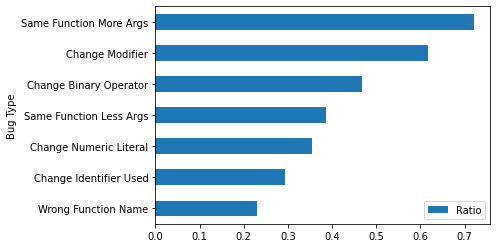

In [58]:
ratio_cnt_df.Ratio.sort_values().plot.barh(legend=True)